In [1]:
import scipy 

import numpy as np

import matplotlib.pylab as plt

import scipy.linalg

It is considered that, in addition to the shape of the average contact frequency as a function of genomic distance, the variation along the diagonal itself, particularly near boundary elements (CTCF sites), might represent changes in biophysical parameters such as lifetime, velocity, and the number of extruders. Therefore, in this Jupyter Notebook, we defined an "isolation score" that measures the relative weight of contacts inside a topologically associating domain (TAD) compared to outside of it, specifically for points close to boundary elements.

### function

In [2]:
def get_isolation_snippets(contact_map, delta=1,diag_offset=1,max_distance=10,state=1):
        csize=len(contact_map)//2
        window_size=4*(diag_offset+delta)+1
        pile_center = contact_map[csize-window_size//2:csize+window_size//2+1,
                       csize-window_size//2:csize+window_size//2+1]
    
        out_tad = np.zeros(np.shape(pile_center))
        mask_out=np.zeros(np.shape(pile_center),dtype=bool)
        mask_out[window_size//2-diag_offset:window_size//2,
                 window_size//2+1:window_size//2+diag_offset+1]\
        =True
        out_tad[mask_out] = pile_center[mask_out]
        out_tad = np.tril( np.triu(out_tad,state*(diag_offset+1)), max_distance)
        
        
        in_tad = np.zeros(np.shape(pile_center))
        mask=np.zeros(np.shape(pile_center),dtype=bool)
        mask[delta:delta+diag_offset,
                diag_offset+delta+1:2*diag_offset+delta+1]=True
        in_tad[mask] = pile_center[mask]
        
        mask=np.zeros(np.shape(pile_center),dtype=bool)
        mask[window_size//2+delta:window_size//2+diag_offset+delta,
             window_size//2+diag_offset+delta+1:window_size//2+2*diag_offset+delta+1]=True
        in_tad[mask] = pile_center[mask]
        in_tad = np.tril( np.triu(in_tad,state*(diag_offset+1)), max_distance)
        
        return in_tad, out_tad, pile_center

def isolation_score(contact_map, delta, diag_offset, max_dist,state,pseudo_count=1):
    in_tad, out_tad, pile_center = get_isolation_snippets(
        contact_map, delta, diag_offset, max_dist,state
    )
    assert pile_center.shape == (len(in_tad), len(in_tad))
    return (pseudo_count+np.mean(pile_center[in_tad>0]))/(pseudo_count+np.mean(pile_center[out_tad>0]))

### Example

Here we can make a symmetirc matrix using a function from scipy.linalg to clarify isolated regions/scores.

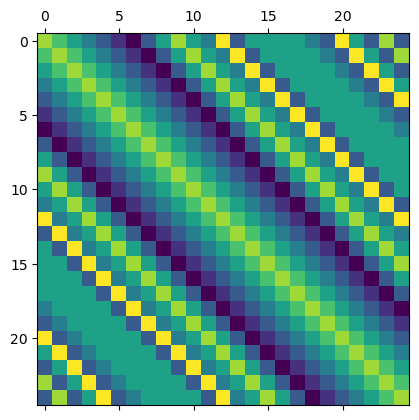

In [3]:
mat=scipy.linalg.toeplitz( [7,6,5, 4,3,2,1,3,5,7,5,4,8,3,5,5,5,5,4,3,8,5,3,7,3])
plt.matshow(mat)

 For such as symmetric matrix we expect to obtain isolated_score=1, either with diagonal or with excluding diagonal:

isolation score is 1.0


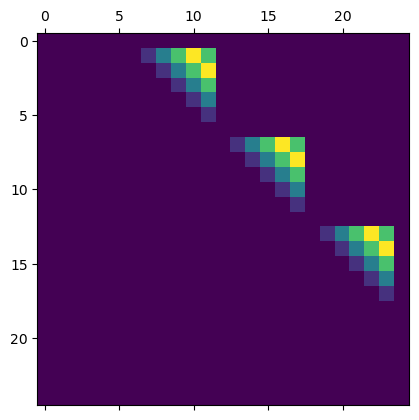

In [5]:
a,b,c=get_isolation_snippets(mat, delta=1,diag_offset=5,max_distance=19,state=1)
plt.matshow(a+b)
iso_score=isolation_score(mat,delta=1,diag_offset=5,max_dist=19,state=1,pseudo_count=1)
print('isolation score is %s'%iso_score)

Or, with changing size and separation:

isolation score is 1.0


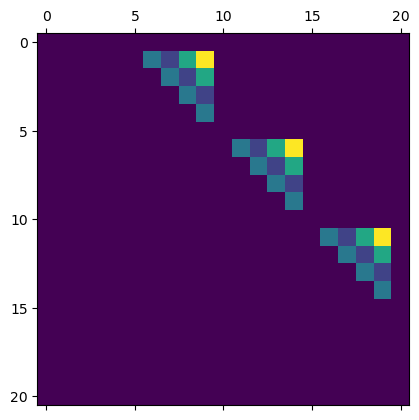

In [6]:
a,b,c=get_isolation_snippets(mat, delta=1,diag_offset=4,max_distance=19,state=1)
plt.matshow(a+b)
iso_score=isolation_score(mat,delta=1,diag_offset=4,max_dist=19,state=1,pseudo_count=1)
print('isolation score is %s'%iso_score)

isolation score is 1.0


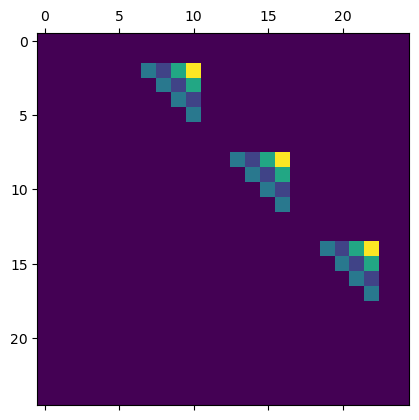

In [8]:
a,b,c=get_isolation_snippets(mat, delta=2,diag_offset=4,max_distance=19,state=1)
plt.matshow(a+b)
iso_score=isolation_score(mat,delta=2,diag_offset=4,max_dist=19,state=1,pseudo_count=1)
print('isolation score is %s'%iso_score)

With including near diagonal pixels:

isolation score is 1.0


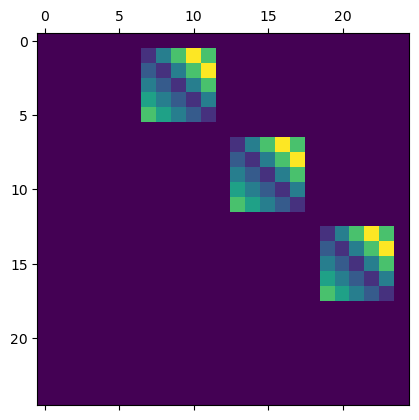

In [9]:
a,b,c=get_isolation_snippets(mat,1,5,19,0)
plt.matshow(a+b)
iso_score=isolation_score(mat,delta=1,diag_offset=4,max_dist=19,state=0,pseudo_count=1)
print('isolation score is %s'%iso_score)

And for an unisotropic matrix:

isolation score is 0.4166666666666667


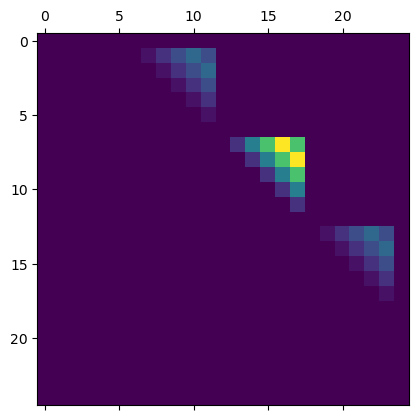

In [12]:
a,b,c=get_isolation_snippets(mat,1,5,19,1)
s=a+3*b
plt.matshow(s)
iso_score=isolation_score(s,delta=1,diag_offset=4,max_dist=19,state=1,pseudo_count=1)
print('isolation score is %s'%iso_score)

### Tests

In [13]:
example_A=np.array(np.ones((18,18)))


isolation score is 1.0


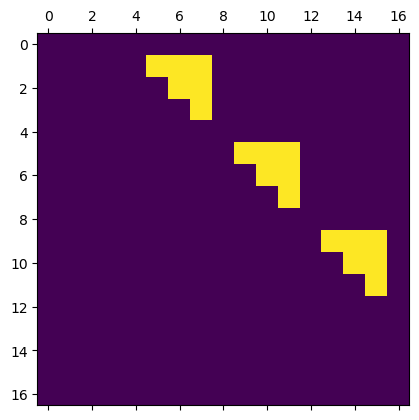

In [14]:
a,b,c=get_isolation_snippets(example_A,1,3,10,1)
mat=a+b

plt.matshow(mat)
iso_score=isolation_score(mat,delta=1,diag_offset=3,max_dist=10,state=1,pseudo_count=1)
print('isolation score is %s'%iso_score)

isolation score is 2.0


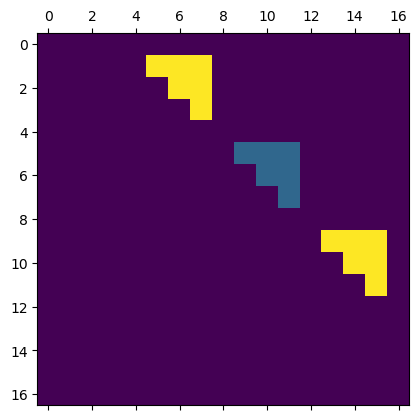

In [15]:
a,b,c=get_isolation_snippets(example_A,1,3,10,1)
mat=3*a+b

plt.matshow(mat)
iso_score=isolation_score(mat,delta=1,diag_offset=3,max_dist=10,state=1,pseudo_count=1)
print('isolation score is %s'%iso_score)

isolation score is 0.5


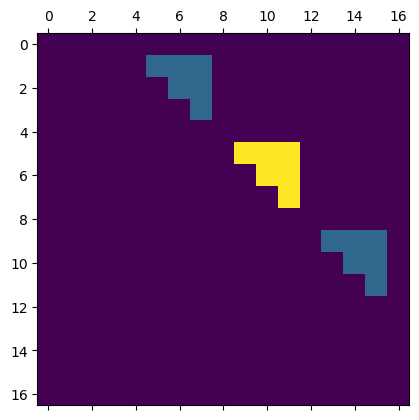

In [16]:
a,b,c=get_isolation_snippets(example_A,1,3,10,1)
mat=a+3*b

plt.matshow(mat)
iso_score=isolation_score(mat,delta=1,diag_offset=3,max_dist=10,state=1,pseudo_count=1)
print('isolation score is %s'%iso_score)